#  Exploratory Data Analysis & Visualization - Ford GoBike ( February 2019)

## by (Daniel .A. Ogiku)

## Investigation Overview

> In this investigation, I'm interested in the bike trip trends and types of bikers in the bay Area bike sharing system. The main focus was on trip duration, period (weekday, hours), age, gender and user types.

## Dataset Overview

> This document explores the trip data from the Ford GoBike's sharing system for public containing bike rides from February 2019. The attributes included the trip start/end time, as well as additional variabless such as user type, gender, and age

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

## Distribution of Trip Duration (Minutes)

#### comment
- The distribution of trip duration is skewed to the left<br>
- The average trip is about 11 minutes, with 75% of trips being under 13 minutes. Looking at the histogram, most rides fall in between the 3 - 15 minute range. <br>
- This implies riders are making more short distance rides.

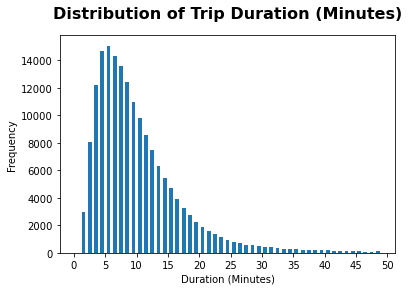

In [3]:
# Duration of the bike rides < 50 MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45, 50]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_bike, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_bike['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Distribution of Trip Duration (Minutes)", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)')
plt.xticks(ticks, labels)
plt.ylabel('Frequency');

## Gender Breakdown - Male vs. Female vs. Other

#### comment

- The visual above demonstrates the overwhelming majority of the bikers are male
- Men account for about 74.4% of the total riders.<br>
- Female riders represents 23.3% of total users
- 'Other' represents the remaining 2.1% 

- Breakdown for member gender from highest to lowest is Male, Female and other <br>
- The chart revealed that Male riders are more than 3x of female riders

In [4]:
# Usage by females, males, and other
gender = df_bike.member_gender.value_counts()
gender

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

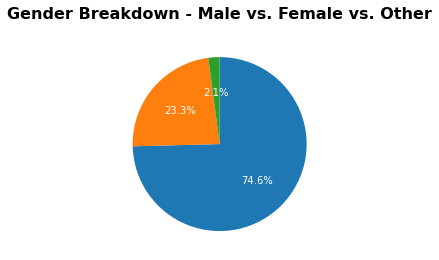

In [5]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('Gender Breakdown - Male vs. Female vs. Other', y=1.05, fontsize=16, fontweight='bold', color = 'black');

## Customers vs. Subscribers Trips Below 60 Years Old

#### comment

- For a marketing campaign, we can divide the campaign into two (customer vs subscriber). From the data above, we can focus on 'Customers' aged 27 - 36 years old.
- Still on the marketing camapign suggestion, For 'Subscribers', we can focus on ages ranging from 24 to 33.
- Customers peaked first at age 30
- Subscriber peaked first at age 25, then peaked again at age 31
- It took up to 12 years for 'Customer' to peak
- While it took just 7 years for 'Subscriber' to peak initially and the second peak came 5 years after the first peak
- For customers, members aged 30 years took the highest number of bike trips
- For subscribers, members aged 31 years took the highest number of bike trips

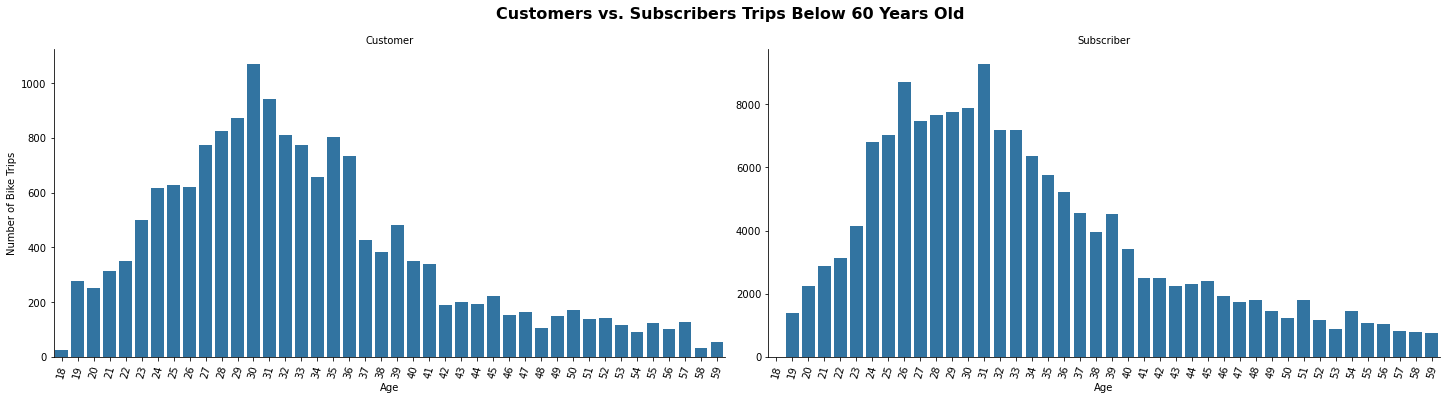

In [6]:
# Customer vs. Subscriber Usage by Age
data = df_bike.query('member_age < 60')

default_color = sb.color_palette()[0]

graph = sb.catplot(data=data, x = 'member_age', col='user_type', kind='count', color = default_color, sharey = False, height=5, aspect=2);

graph.set_axis_labels('Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers vs. Subscribers Trips Below 60 Years Old', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

## Weekdays vs Hours vs User type

#### comment
- The most active hours of the day ranges from 6:00 hours - 20:00 hours every Monday - Friday for both Customers and Subscribers
- Analyzing the pattern of the Customer user type, we can see that the most bike trips happen during 8:00 - 9:00 hours in the morning and between 16:00 - 18:00 hours ( with 17:00 hours peak) for weekdays
- Still on customer user type , During the weekend, there are fewer rides with peak of bike trips is 13:00 hours on Saturday and Sunday. 
- Studying the behavior of the Subsriber user type, we can see that the most bike trips happen during 7:00 - 9:00 hours in the morning and between 16:00 - 18:00 hours ( with 17:00 hours peak) for weekdays.
- The number of rides for  Subscribers during the weekend reduced drastically in comparison to Customers



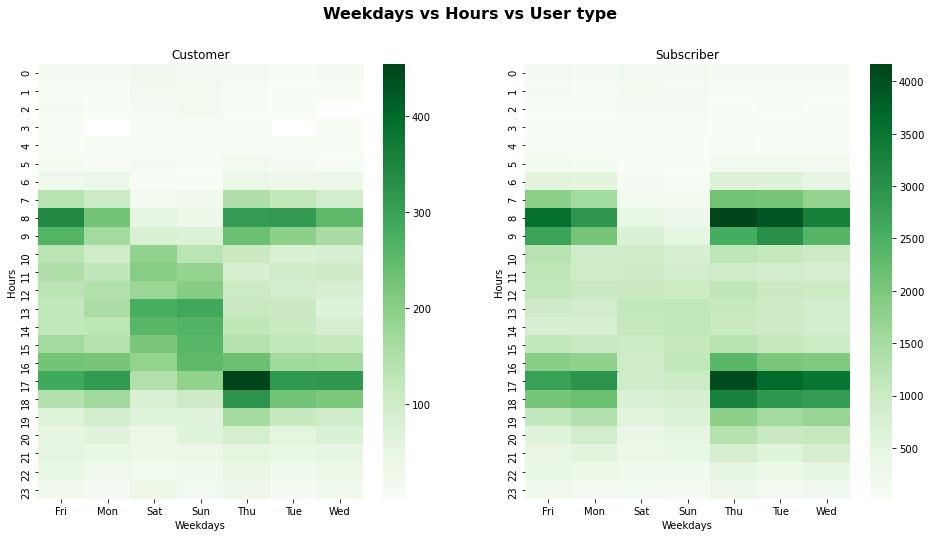

In [7]:
plt.figure(figsize = (16,8))
plt.suptitle('Weekdays vs Hours vs User type', fontsize=16, fontweight='bold')

plt.subplot(1, 2, 1)
df_customer = df_bike.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_dayofweek"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_dayofweek", "bike_id")
sb.heatmap(df_customer, cmap = "Greens")
plt.title("Customer")
plt.xlabel("Weekdays")
plt.ylabel("Hours");

plt.subplot(1, 2, 2)
df_subscriber = df_bike.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_dayofweek"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_dayofweek", "bike_id")
sb.heatmap(df_subscriber, cmap = "Greens")
plt.title("Subscriber")
plt.xlabel("Weekdays")
plt.ylabel("Hours");

### Summary
Overall, The GoBike system is an affordable and convenient transportation system where a large number of people can benefit from. It is also a healthy, budget and environmentally friendly way of moving around the city for both customers and subscribers

- Subscribers (i.e. daily commuters) benefit from a healthy commuting transport system
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible way for touring the city.

During a marketing campaign, a good recommendation will be allocating more resources to target Men riders ranging from 20-40 years old. From the analysis, This was dsicovered to be an active demographic that could be targeted for marketing


In [9]:
!jupyter nbconvert GoFordBike_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook GoFordBike_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 670080 bytes to GoFordBike_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Jonathan\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Jonathan\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Jonathan\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Jonathan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Jonathan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebo